## Importing Libraries and Reading File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('train_users_2.csv')

# Data Understanding 

In [2]:
df.head(10)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
7,0d01nltbrs,2010-01-03,20100103191905,2010-01-13,FEMALE,47.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,US
8,a1vcnhxeij,2010-01-04,20100104004211,2010-07-29,FEMALE,50.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US
9,6uh8zyj2gn,2010-01-04,20100104023758,2010-01-04,-unknown-,46.0,basic,0,en,other,craigslist,omg,Web,Mac Desktop,Firefox,US


## Showing Description of Numerical Data

In [3]:
df.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


## Showing Non Null, Row and Column count and Data Types of Each Column 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

## Showing Null Values Count in Each Column

In [5]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## Showing Null Percentage in Each Column

In [6]:
df.isnull().sum()/len(df) *100

id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         58.347349
gender                      0.000000
age                        41.222576
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.841402
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
country_destination         0.000000
dtype: float64

# Data Cleaning

## Removing Null Values in "Date First Booking" Column

In [7]:
df = df.dropna(subset=['date_first_booking'])

In [8]:
print(f'Column date_first_booking null values count is {df.date_first_booking.isnull().sum()}')

Column date_first_booking null values count is 0


## Understanding the Outliers in the Age Column

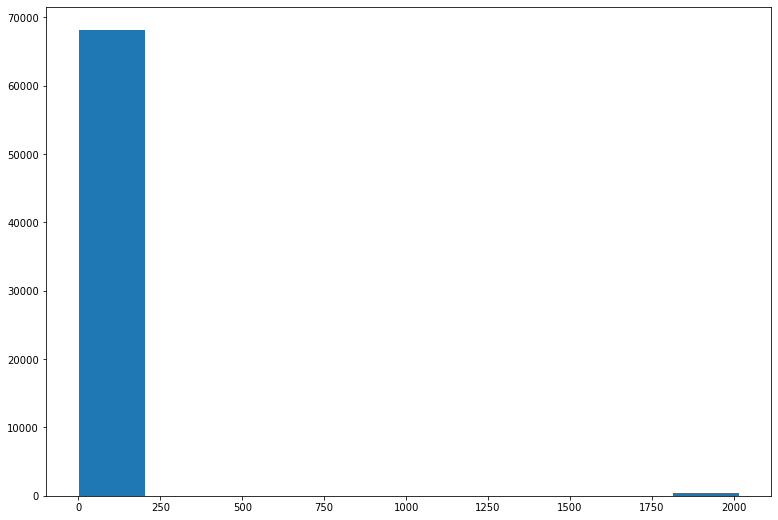

In [9]:
plt.figure(figsize =(13, 9))
plt.hist(df.age)
plt.show()

## Filling the Null Values in Age with the Mode of the Column

In [10]:
df.loc[:,'age'] = df.loc[:,'age'].fillna(df.age.mode()[0])

In [11]:
print(f'Column age null values count is {df.age.isnull().sum()}')

Column age null values count is 0


## Removing the Outliers by adjusting the minimum and maximum values

In [12]:
df.loc[df.age > 120, 'age'] = np.nan
df.loc[df.age < 18, 'age'] = np.nan
df = df.dropna(subset=['age'])

In [13]:
print(f'Column age maximum value is {df.age.max()}, and minimum value is {df.age.min()}')

Column age maximum value is 115.0, and minimum value is 18.0


## Removing Null Values from First Affiliate Tracked column

In [14]:
df.loc[:,'first_affiliate_tracked'] = df.loc[:,'first_affiliate_tracked'].fillna(df.first_affiliate_tracked.mode()[0])

In [15]:
print(f'Column first_affiliate_tracked null values count is {df.first_affiliate_tracked.isnull().sum()}')

Column first_affiliate_tracked null values count is 0


## Rechecking the Null Values Count in Each Column

In [16]:
df.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
date_first_booking         0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

# Data Visualization

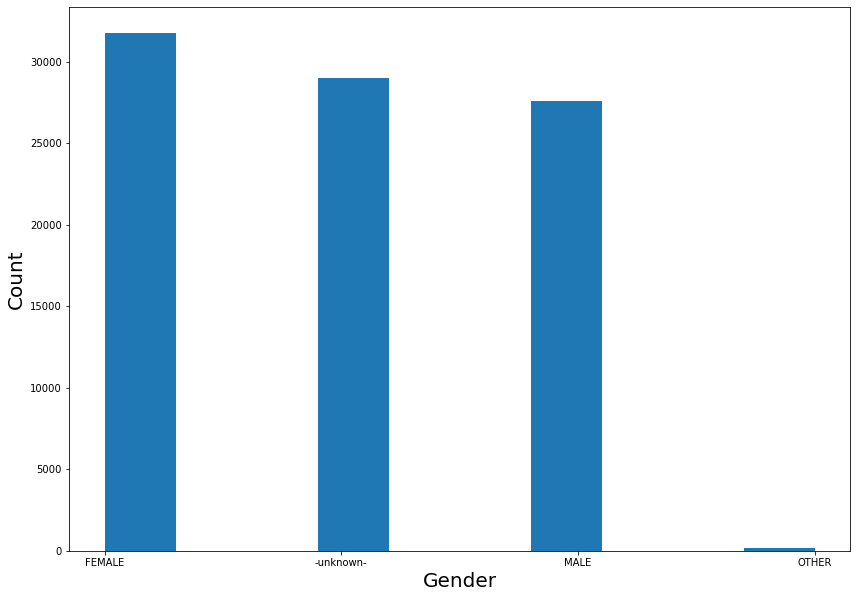

In [17]:
plt.figure(figsize=(14,10))
plt.hist(df.gender)
plt.xlabel('Gender', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

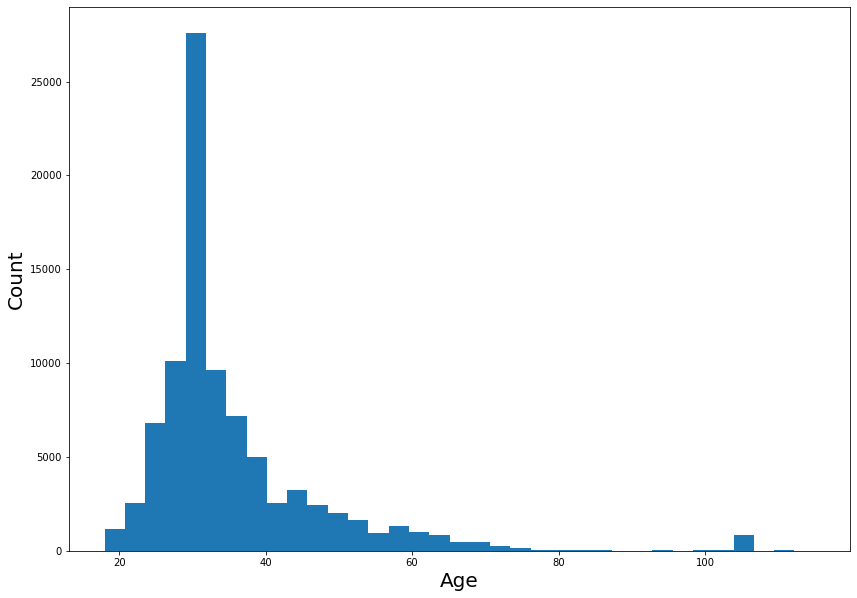

In [18]:
plt.figure(figsize=(14,10))
plt.hist(df.age,bins=35)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

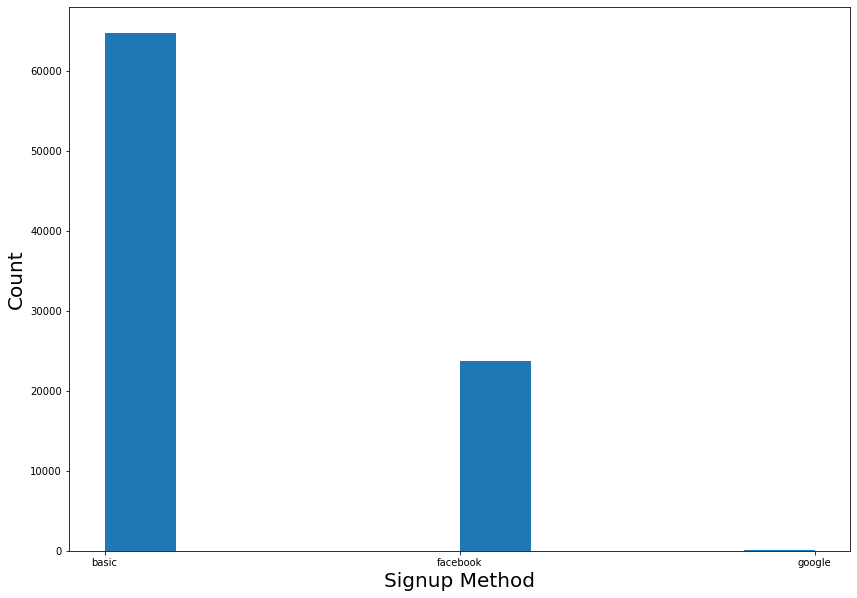

In [19]:
plt.figure(figsize=(14,10))
plt.hist(df.signup_method, bins = 10)
plt.xlabel('Signup Method', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

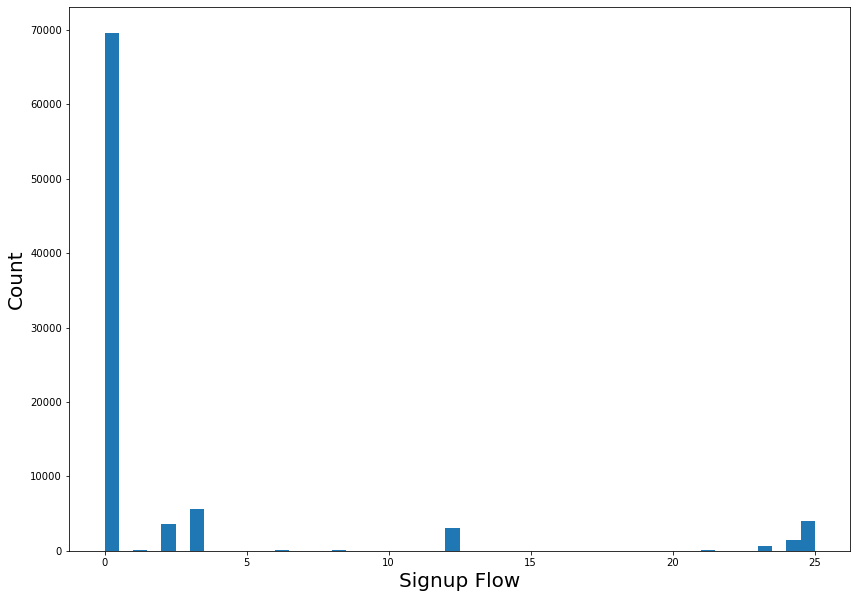

In [20]:
plt.figure(figsize=(14,10))
plt.hist(df.signup_flow,bins=50)
plt.xlabel('Signup Flow', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

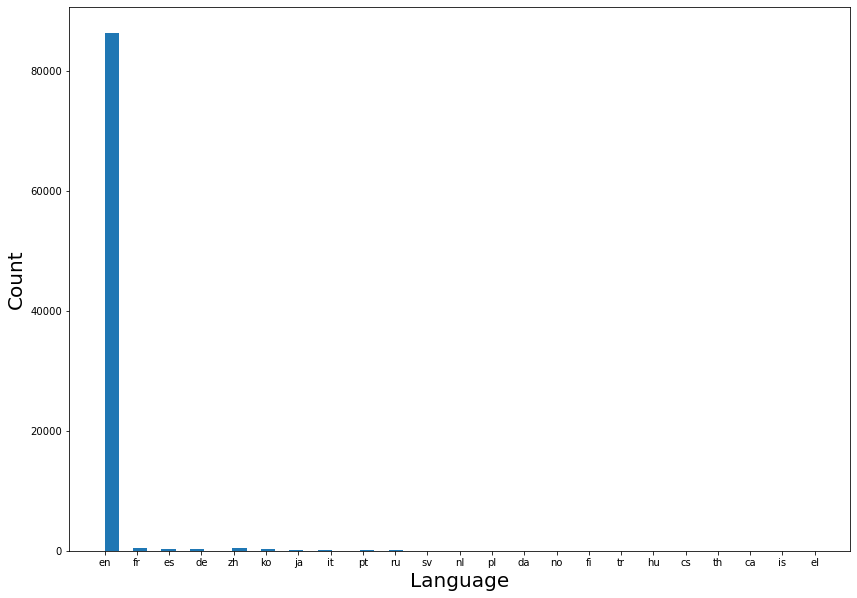

In [21]:
plt.figure(figsize=(14,10))
plt.hist(df.language,bins=50)
plt.xlabel('Language', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

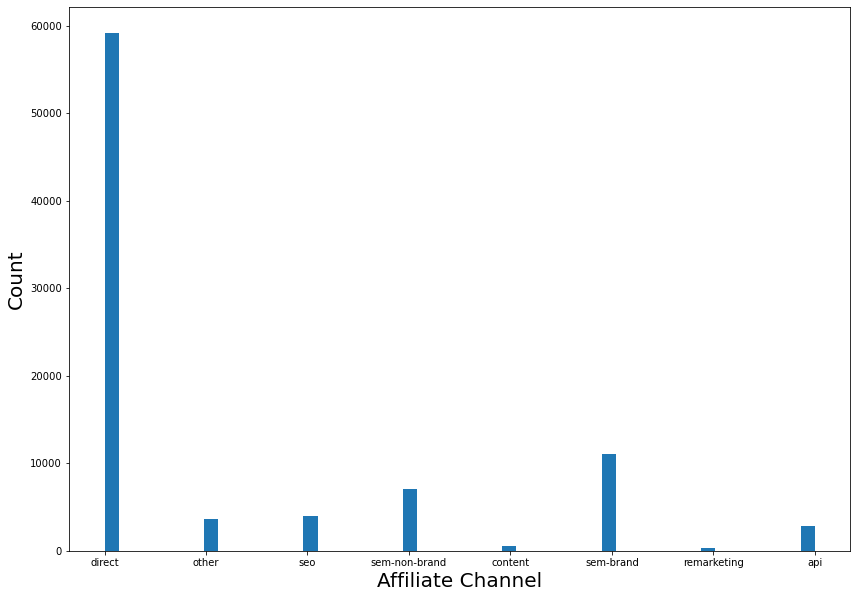

In [22]:
plt.figure(figsize=(14,10))
plt.hist(df.affiliate_channel,bins=50)
plt.xlabel('Affiliate Channel', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

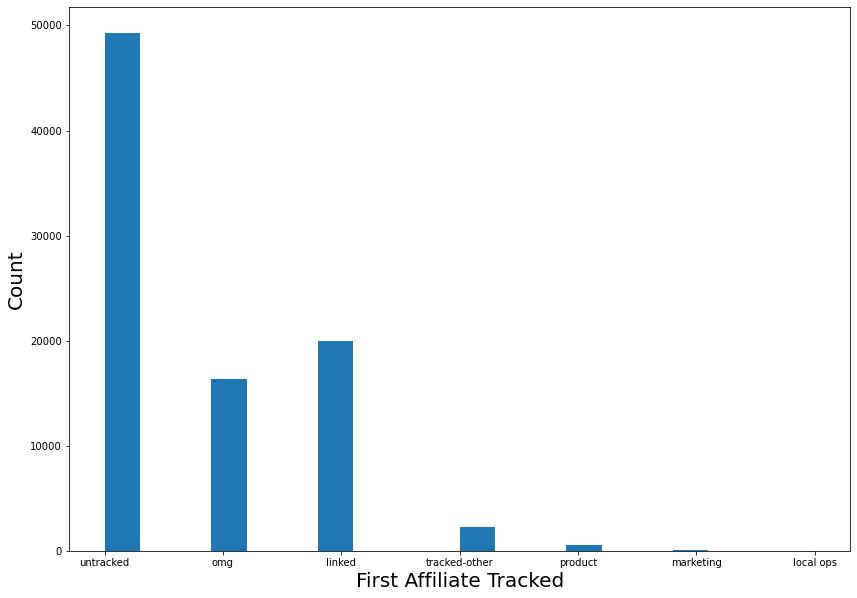

In [23]:
plt.figure(figsize=(14,10))
plt.hist(df.first_affiliate_tracked,bins=20)
plt.xlabel('First Affiliate Tracked', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

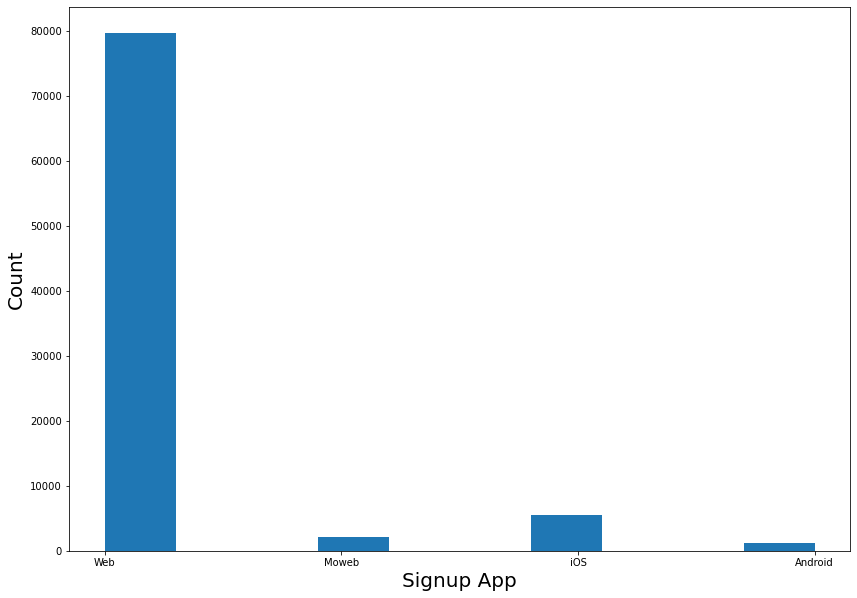

In [24]:
plt.figure(figsize=(14,10))
plt.hist(df.signup_app,bins=10)
plt.xlabel('Signup App', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

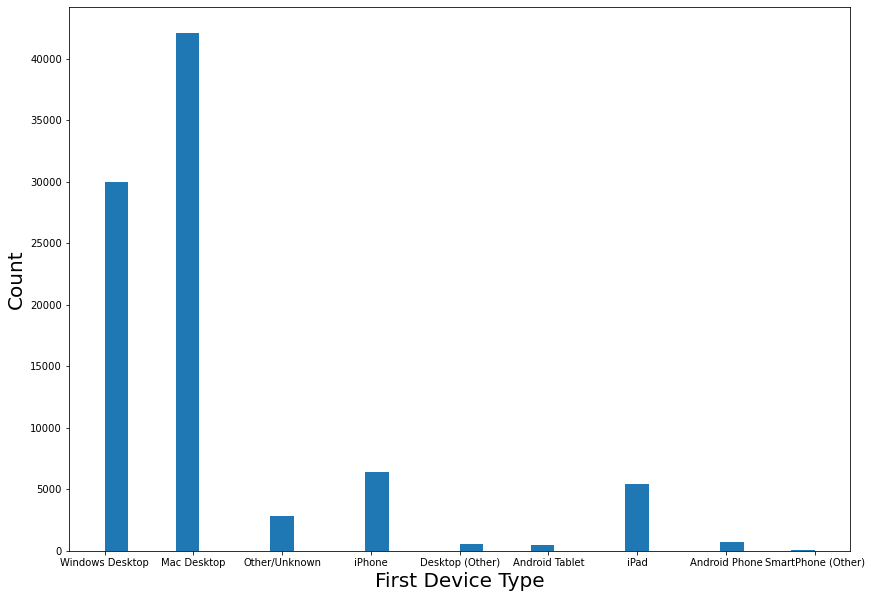

In [25]:
plt.figure(figsize=(14,10))
plt.hist(df.first_device_type,bins=30)
plt.xlabel('First Device Type', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

##### *Zoom in for detailed view*

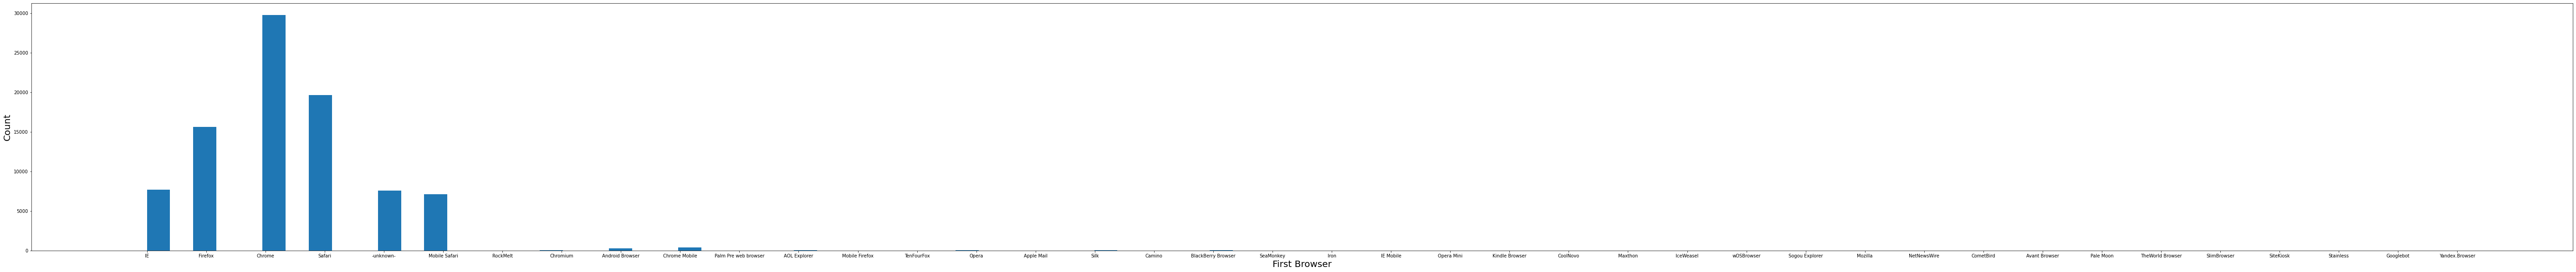

In [26]:
plt.figure(figsize=(100,10))
plt.hist(df.first_browser,bins=100)
plt.xlabel('First Browser', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()

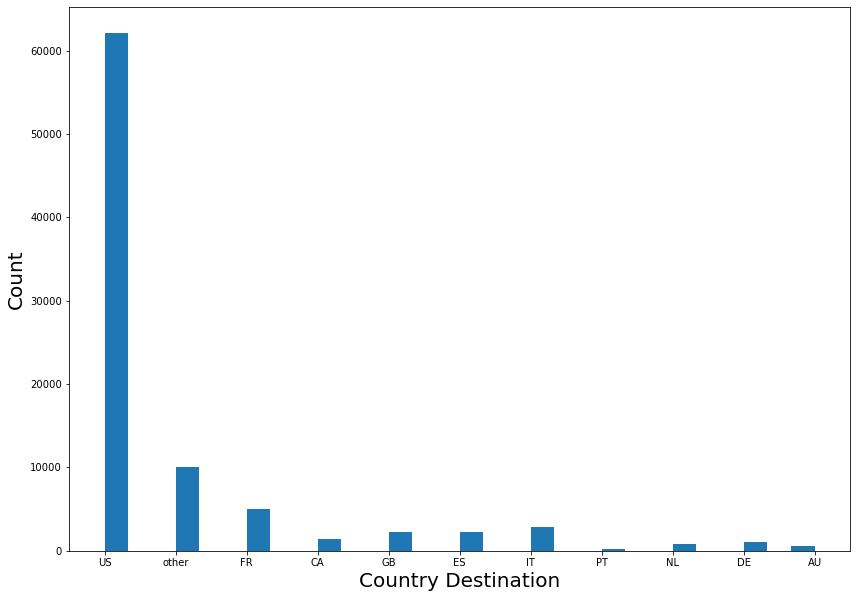

In [27]:
plt.figure(figsize=(14,10))
plt.hist(df.country_destination,bins=30)
plt.xlabel('Country Destination', fontsize=20)
plt.ylabel('Count', fontsize=20)
plt.show()